# Jupyter Notebook for Running `t1` on DELPHI

After downloading the `t1` dataset, this notebook can be run to perform one iteration of the training and detection pipeline for the `t1` dataset.

The plots generated in this notebook are used in: 
- **Figure 11**: Examples of failed detection pipelines  
- **Appendix B**: Full list of failed detection pipelines

To obtain other plots and results involving `t1`, such as the baseline results replicating performance across different training set sizes, please refer to the `README.md` file and navigate to the `jobs/` directory to run the full pipeline on **CSD3**.

## Important information to run this notebook:

It is assumed that both the `t1` and `t2` datasets have been downloaded and placed in the `data/` folder located in the parent directory of this package. Within `data/`, there should be two subfolders: `t1/` and `t2/`. Each of these should contain their respective `images/` and `annotations/` subfolders.

In [1]:
from DELPHI.LPdetection import LPPreprocess, LPtrain, LPDetect

### 1. Training 

This training process involves loading in the paths to the images and annotations, and running colour feature learning and spatial layout modelling. 

In [2]:
og_im = "./data/t1/images" 
og_lp = "./data/t1/annotations"
LPPreprocess(impath=og_im, lppath=og_lp, train_ratio=0.8,seed=100) 
#stored under test_annotations, test_images, train_annotations, train_images

Duplicated annotations: []
Found 60 images
Found 99 annotations
Matched pairs: 60
Unmatched images: []
Unmatched annotations: ['0148', '0178', '0188', '0231', '0246', '0266', '0282', '0310', '0315', '0333', '0381', '0455', '0458', '0459', '0470', '0494', '0555', '0590', '0700', '0734', '0738', '0816', '0828', '0853', '0859', '0926', '0942', '0956', '1011', '1023', '1106', '1124', '1134', '1139', '1185', '1195', '1208', '1220', '1224']
Matched 60 pairs → 48 train, 0 validation, 12 test.


In [3]:
impath='./data/t1/train_images'
lppath='./data/t1/train_annotations'

In [4]:
train_dict=LPtrain(impath,lppath)

The selected images for this train set are: ['0697', '0127', '0358', '0154', '0456', '0383', '0609', '0001', '0361', '0002', '0078', '0003', '0138', '0133', '0591', '0044', '0121', '0104', '0204', '0607', '0156', '0662', '0717', '0302', '0011', '0480', '0021', '0225', '0261', '0857', '0584', '0172', '0112', '0010', '0128', '0790', '0020', '0602', '0420', '0026', '0363', '0268', '0190', '0253', '0081', '0804', '0336', '0055']


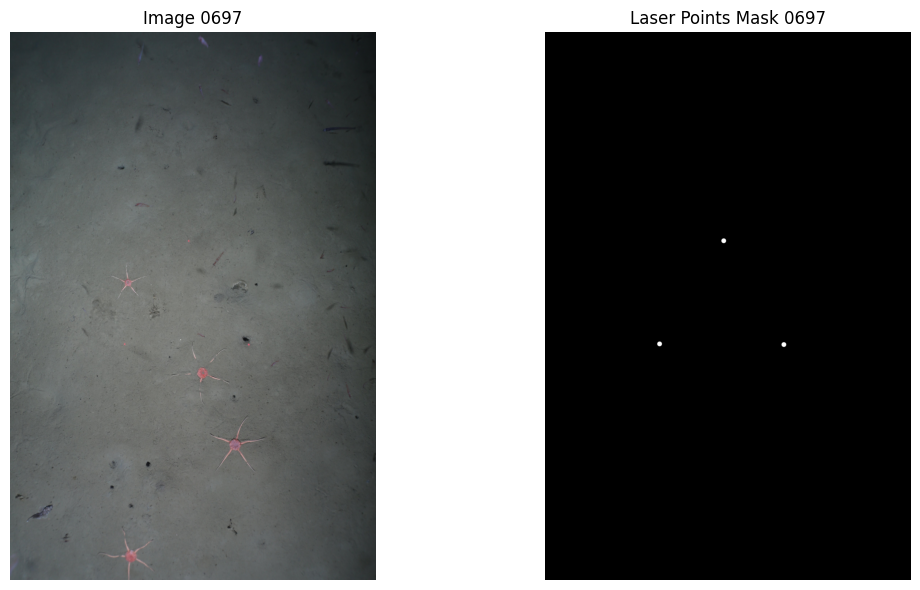

Laser Point Coordinates for Image 0697: [(1875, 2194), (1202, 3278), (2506, 3285)]


In [5]:
LPtrain.imgdisplay(train_dict,"0697") 


In [6]:
combined_mask = LPtrain.spatial_learning(train_dict,lpradius=25) 

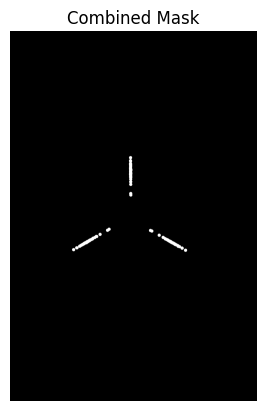

In [7]:
import matplotlib.pyplot as plt

plt.imshow(combined_mask, cmap='gray', vmin=0, vmax=1)
plt.title("Combined Mask")
plt.axis('off')
plt.savefig("./results/figures/4.9.7_t2combined_mask.png", dpi=300)
plt.show()


In [8]:
threshold, cluster_gamma, S_gamma, fig = LPtrain.color_learning(train_dict, lpradius = 3, backgroundradius = 25, plot = True)

### 2. Detection

This detection process involves using the parameters stored in the training process to predict laser points in the test images.

In [9]:
test_detector = LPDetect(
    impath='./data/t1/test_images',
    lppath='./data/t1/test_annotations',
    threshold=threshold,
    cluster_gamma=cluster_gamma,
    S_gamma=S_gamma,
    num_images= None
)

The selected images for this test set are: ['0027', '0167', '0531', '0024', '0144', '0514', '0187', '0196', '0834', '0592', '0232', '0052']


In [10]:
test_detector.gray_value_image(plot=True,save_path="./results/figures/4.9.5_t2greyimgvalue.png")

100%|██████████| 12/12 [07:27<00:00, 37.32s/it]


[SAVED] Grid plot saved to ./results/figures/4.9.5_t2greyimgvalue.png


In [11]:
LPtrain.imgdisplay(test_detector,"0381") #assumption that the laser points are centered in the image

Error: Image with ID 0381 not found.


In [12]:
test_detector.binary_mask_image(plot=True,save_path="./results/figures/4.9.4_t2morphology.png")


[0027] Raw binary pixels before morphology: 115
[0027] Binary pixels after morphology: 103
[0167] Raw binary pixels before morphology: 176
[0167] Binary pixels after morphology: 161
[0531] Raw binary pixels before morphology: 34
[0531] Binary pixels after morphology: 16
[0024] Raw binary pixels before morphology: 1422
[0024] Binary pixels after morphology: 1039
[0144] Raw binary pixels before morphology: 313
[0144] Binary pixels after morphology: 269
[0514] Raw binary pixels before morphology: 4009
[0514] Binary pixels after morphology: 3705
[0187] Raw binary pixels before morphology: 124
[0187] Binary pixels after morphology: 84
[0196] Raw binary pixels before morphology: 126
[0196] Binary pixels after morphology: 116
[0834] Raw binary pixels before morphology: 6257
[0834] Binary pixels after morphology: 5787
[0592] Raw binary pixels before morphology: 736
[0592] Binary pixels after morphology: 329
[0232] Raw binary pixels before morphology: 111
[0232] Binary pixels after morphology: 

In [13]:
test_detector.apply_train_mask(combined_mask,save_path="./results/figures/4.9.3_t2mastermask.png") 

[SAVED] Grid plot saved to ./results/figures/4.9.3_t2mastermask.png


In [14]:
test_detector.connect_and_weight_regions(target_number_of_regions=5,plot=True,save_path="./results/figures/4.9.2_t2regionselection.png")


[0027] Connected regions found: 3
[0027] LP candidates found: 3
[0167] Connected regions found: 3
[0167] LP candidates found: 3
[0531] Connected regions found: 1
[0531] LP candidates found: 1
[0024] Connected regions found: 2
[0024] LP candidates found: 2
[0144] Connected regions found: 3
[0144] LP candidates found: 3
[0514] Connected regions found: 3
[0514] LP candidates found: 3
[0187] Connected regions found: 4
[0187] LP candidates found: 4
[0196] Connected regions found: 3
[0196] LP candidates found: 3
[0834] Connected regions found: 3
[0834] LP candidates found: 3
[0592] Connected regions found: 3
[0592] LP candidates found: 3
[0232] Connected regions found: 3
[0232] LP candidates found: 3
[0052] Connected regions found: 3
[0052] LP candidates found: 3
[SAVED] Grid plot saved to ./results/figures/4.9.2_t2regionselection.png


In [15]:
results = test_detector.predict_laserpoint(train_dict.image_dict)

[Warning] Not enough LP candidates for 0531 — storing raw candidates
[Warning] Not enough LP candidates for 0024 — storing raw candidates


In [16]:
precision, recall, f1, bad_ids = test_detector.performance_test()

ground truth and predicted points for 0027 is [(1878, 2220), (1236, 3261), (2488, 3274)] and [(2488, 3275), (1236, 3262), (1877, 2220)]
ground truth and predicted points for 0167 is [(1875, 2226), (1226, 3268), (2490, 3277)] and [(2489, 3278), (1874, 2227), (1226, 3267)]
ground truth and predicted points for 0531 is [(1877, 2372), (1384, 3176), (2332, 3186)] and [(1384, 3176)]
ground truth and predicted points for 0024 is [(1877, 2245), (1237, 3261), (2477, 3267)] and [(2477, 3269), (1237, 3262)]
ground truth and predicted points for 0144 is [(1876, 2100), (1126, 3324), (2602, 3338)] and [(1127, 3326), (2600, 3339), (1875, 2100)]
ground truth and predicted points for 0514 is [(1875, 2092), (1110, 3335), (2620, 3349)] and [(1113, 3335), (1874, 2093), (2620, 3351)]
ground truth and predicted points for 0187 is [(1875, 2315), (1326, 3208), (2393, 3221)] and [(1327, 3209), (1876, 2317), (2396, 3224)]
ground truth and predicted points for 0196 is [(1877, 2305), (1311, 3220), (2404, 3228)] a

In [17]:
test_dict = test_detector.image_dict
image_0196 = test_dict["0027"]["image"]
predicted_lp_0196 = test_dict["0027"]["predicted_laser_points"]
test_detector.visualize_overlay(image_0196, combined_mask, predicted_lp_0196, lpradius=30, title="0027 results",block_size=60, save_path="./results/figures/4.9.6_t2_exampleresult.png")



[SAVED] Overlay visualization saved to ./results/figures/4.9.6_t2_exampleresult.png


In [18]:
test_detector.visualise_failed_predictions(bad_ids, lpradius= 50,save_path="./results/figures/4.9.1_t2failedpred.png")


These test images failed to predict three laser points (2 total):
['0531', '0024']

